In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import talib

In [4]:
df = pd.read_csv('../../data/yinance/MSFT.csv')
df.head()
df.describe()

,Close,High,Low,Open,Volume
count,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,102.458692,103.440768,101.374441,102.420838,3.895754e+07
std,100.530006,101.527406,99.431276,100.496751,2.245626e+07
min,11.159394,11.505594,10.953148,11.196224,7.425600e+06
25%,23.723560,23.914675,23.498127,23.721387,2.398462e+07
50%,48.971560,49.195981,48.606149,48.893490,3.279110e+07
75%,165.831585,166.967866,162.911557,166.002089,4.865400e+07
max,377.783630,379.363000,373.301945,378.829959,3.193179e+08


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3774 non-null   object 
 1   Close   3774 non-null   float64
 2   High    3774 non-null   float64
 3   Low     3774 non-null   float64
 4   Open    3774 non-null   float64
 5   Volume  3774 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 177.0+ KB


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

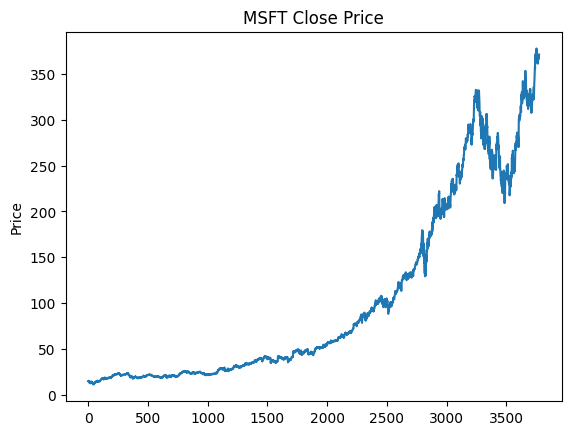

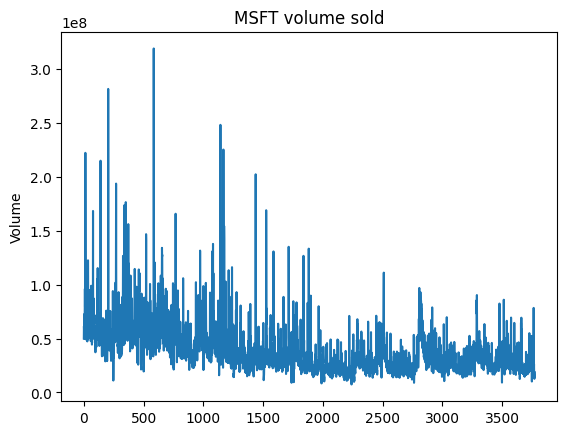

In [6]:
df['Close'].plot(title="MSFT Close Price")
plt.ylabel("Price")
plt.show()

df['Volume'].plot(title="MSFT volume sold")
plt.ylabel("Volume")
plt.show()

In [7]:
price= df["Close"]
df["SMA_20"] = talib.SMA(price, timeperiod=20)
df["SMA_50"] = talib.SMA(price, timeperiod=50)
df["EMA_20"] = talib.EMA(price, timeperiod=20)

df["RSI_14"] = talib.RSI(price, timeperiod=14)

df["MACD"], df["MACD_signal"], df["MACD_hist"] = talib.MACD(
    price, 
    fastperiod=12, 
    slowperiod=26, 
    signalperiod=9
)

df.tail()

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
3769,2023-12-22,369.767883,370.360181,367.921911,368.879451,17107500,368.730389,355.078464,366.580145,56.363342,2.805416,3.840081,-1.034664
3770,2023-12-26,369.846832,372.097540,368.701731,370.182461,12673100,368.535426,356.018111,366.891259,56.447998,2.767033,3.625471,-0.858438
3771,2023-12-27,369.264465,370.241738,368.020642,368.889342,14905400,368.109468,356.849368,367.117278,55.591261,2.658971,3.432171,-0.773200
3772,2023-12-28,370.458862,371.623696,369.353256,370.547702,14327000,367.933260,357.715942,367.435524,57.031664,2.639285,3.273594,-0.634309
3773,2023-12-29,371.209198,372.314805,368.682088,371.169703,18730800,367.791606,358.635943,367.794922,57.954296,2.653640,3.149603,-0.495963


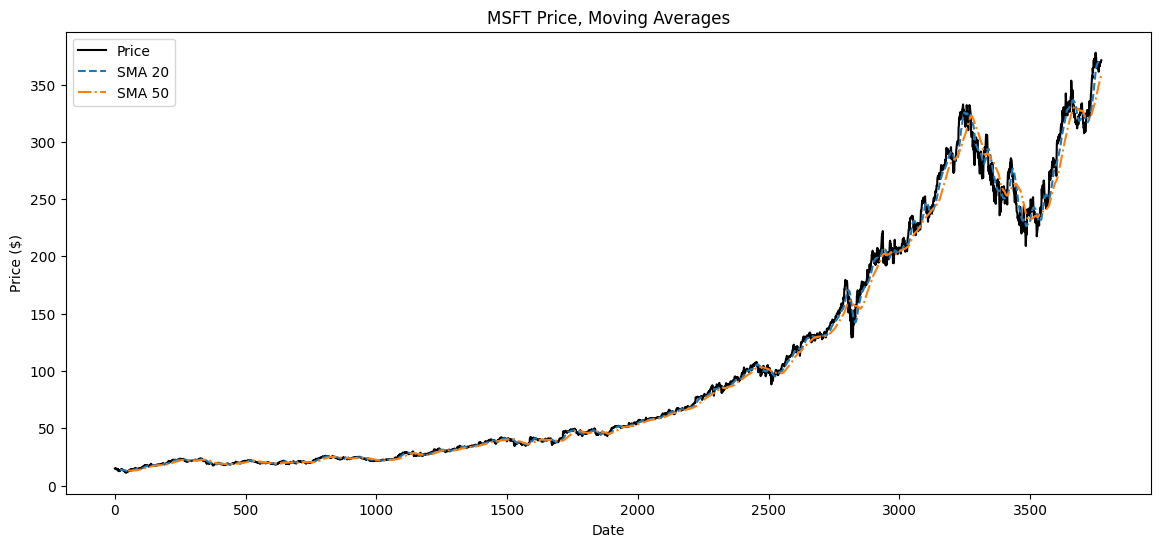

In [8]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df.index, price, label="Price", color="black")
ax.plot(df.index, df["SMA_20"], label="SMA 20", linestyle="--")
ax.plot(df.index, df["SMA_50"], label="SMA 50", linestyle="-.")
ax.set_title("MSFT Price, Moving Averages")
ax.set_xlabel("Date")
ax.set_ylabel("Price ($)")
ax.legend()
plt.show()

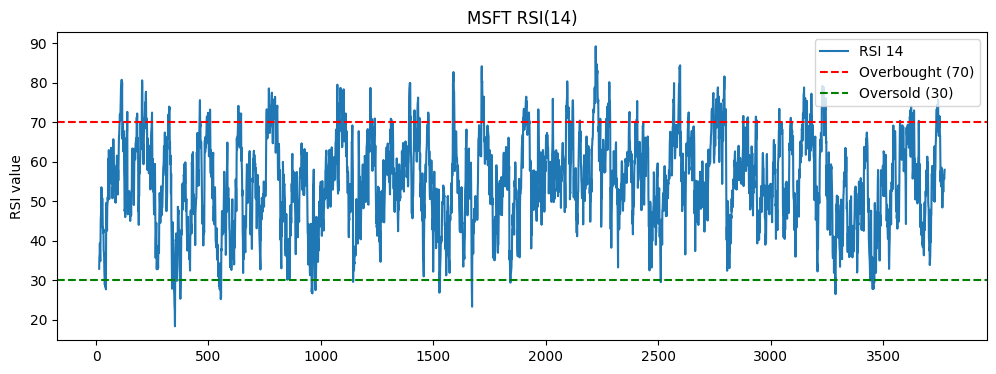

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df.index, df["RSI_14"], label="RSI 14")
ax.axhline(70, color="red", linestyle="--", label="Overbought (70)")
ax.axhline(30, color="green", linestyle="--", label="Oversold (30)")
ax.set_title("MSFT RSI(14)")
ax.set_ylabel("RSI value")
ax.legend()
plt.show()

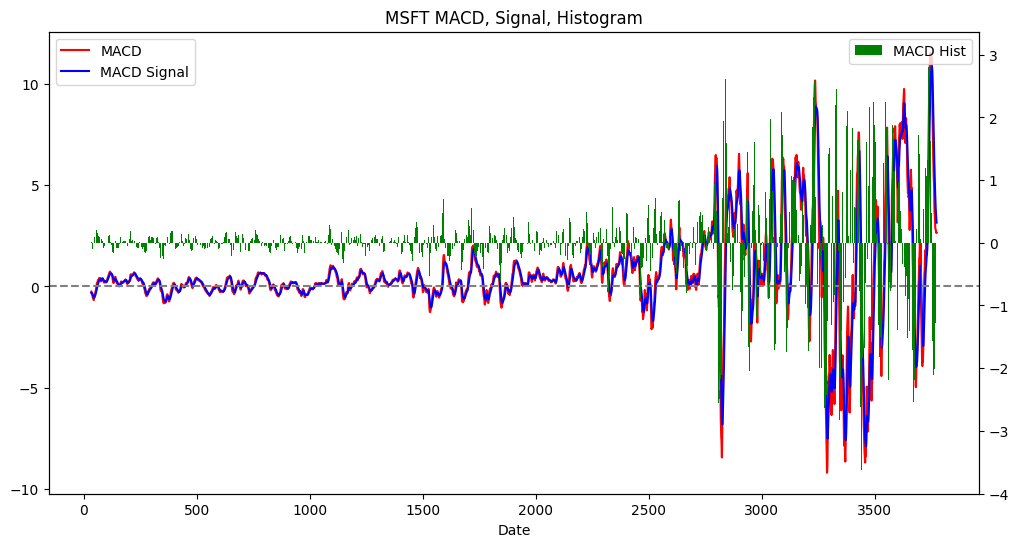

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.index, df["MACD"], label="MACD", color="red")
ax.plot(df.index, df["MACD_signal"], label="MACD Signal", color="blue")
ax.axhline(0, color="grey", linestyle="--")
ax2 = ax.twinx()
ax2.bar(df.index, df["MACD_hist"], label="MACD Hist", color="green")

ax.set_title("MSFT MACD, Signal, Histogram")
ax.set_xlabel("Date")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()